In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
import ast  # for safely evaluating strings as lists
import seaborn as sns
import geopandas as gpd

# Load dataset

In [44]:
DATA_PATH = "Data/dataset.csv"
VISUALS_PATH = "visuals/"

In [4]:
df = pd.read_csv(DATA_PATH)
df.head()

recipe_name  recipe_id  minutes  \
0  arriba   baked winter squash mexican style     137739       55   
1            a bit different  breakfast pizza      31490       30   
2          amish  tomato ketchup  for canning      44061      190   
3                     apple a day  milk shake       5289        0   
4                       aww  marinated olives      25274       15   

  submission_date                                  nutrition  n_steps  \
0      2005-09-16      [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1      2002-06-17  [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
2      2002-10-25  [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   
3      1999-12-06   [160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]        4   
4      2002-04-14   [380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]        4   

                                         ingredients  n_ingredients  \
0  ['winter squash', 'mexican seasoning', 'mixed ...              7   
1  ['prepared pizza crust', 'sausage patty', 'egg...              6   
2  ['tomato juice', 'apple cider vinegar', 'sugar...              8   
3  ['milk', 'vanilla ice cream', 'frozen apple ju...              4   
4  ['fennel seeds', 'green olives', 'ripe olives'...              9   

                                        rating_dates       ratings  n_ratings  \
0         ['2006-02-18', '2010-08-21', '2011-12-05']     [5, 5, 5]          3   
1  ['2002-08-19', '2006-08-27', '2009-07-18', '20...  [0, 5, 4, 5]          4   
2                                     ['2011-08-21']           [5]          1   
3                       ['2002-07-23', '2007-05-10']        [5, 5]          2   
4                                     ['2005-02-26']           [2]          1   

                     cuisine_tags  vegan  vegetarian  
0   ['north-american', 'mexican']  False        True  
1  ['north-american', 'american']  False       False  
2  ['north-american', 'american']  False        True  
3  ['north-american', 'american']  False       False  
4  ['north-american', 'canadian']   True        True

# Preprocess data

In [5]:
# Function to safely convert string representations of lists to actual lists
def str_to_list(s):
    try:
        return ast.literal_eval(s)
    except ValueError:
        return []
str_to_list("[1,2,3]")

[1, 2, 3]

In [6]:
# Apply the conversion to the 'cuisine_tags' and 'ingredients' columns
df['cuisine_tags'] = df['cuisine_tags'].apply(str_to_list)
df['ingredients'] = df['ingredients'].apply(str_to_list)

In [7]:
# Initialize the main dictionary
cuisine_ingredient_dict = {}

# Populate the dictionary
for _, row in df.iterrows():
    for cuisine in row['cuisine_tags']:
        if cuisine not in cuisine_ingredient_dict:
            cuisine_ingredient_dict[cuisine] = {}
        
        for ingredient in row['ingredients']:
            if ingredient in cuisine_ingredient_dict[cuisine]:
                cuisine_ingredient_dict[cuisine][ingredient] += 1
            else:
                cuisine_ingredient_dict[cuisine][ingredient] = 1

In [8]:
for c,d in cuisine_ingredient_dict.items():
    print(f"*** {c} ***")
    for k,v in d.items():
        print(f"  {k}: {v}")

*** north-american ***
  winter squash: 12
  mexican seasoning: 10
  mixed spice: 19
  honey: 1817
  butter: 11386
  olive oil: 5770
  salt: 18945
  prepared pizza crust: 47
  sausage patty: 1
  eggs: 6737
  milk: 5657
  salt and pepper: 3197
  cheese: 746
  tomato juice: 203
  apple cider vinegar: 404
  sugar: 8339
  pepper: 5105
  clove oil: 1
  cinnamon oil: 4
  dry mustard: 837
  vanilla ice cream: 216
  frozen apple juice concentrate: 17
  apple: 284
  fennel seeds: 19
  green olives: 116
  ripe olives: 70
  garlic: 4012
  peppercorn: 42
  orange rind: 182
  orange juice: 998
  red chile: 22
  extra virgin olive oil: 1218
  pork spareribs: 27
  soy sauce: 1054
  fresh garlic: 193
  fresh ginger: 449
  chili powder: 2592
  fresh coarse ground black pepper: 206
  fresh cilantro leaves: 163
  tomato sauce: 1208
  brown sugar: 4008
  yellow onion: 648
  white vinegar: 493
  a.1. original sauce: 59
  liquid smoke: 277
  cracked black pepper: 208
  cumin: 1439
  cinnamon sticks: 142
  o

In [9]:
# Convert counts to percentages and sort
for cuisine, ingredients in cuisine_ingredient_dict.items():
    total = sum(ingredients.values())
    cuisine_ingredient_dict[cuisine] = {k: round((v / total) * 100, 2) for k, v in sorted(ingredients.items(), key=lambda item: item[1], reverse=True)}

# Now cuisine_ingredient_dict contains the required information

In [10]:
for c,d in cuisine_ingredient_dict.items():
    print(f"*** {c} ***")
    for k,v in d.items():
        print(f"  {k}: {v}")

*** north-american ***
  salt: 4.2
  butter: 2.52
  onion: 2.11
  sugar: 1.85
  water: 1.62
  eggs: 1.49
  olive oil: 1.28
  milk: 1.25
  flour: 1.24
  pepper: 1.13
  garlic cloves: 1.09
  garlic: 0.89
  brown sugar: 0.89
  all-purpose flour: 0.86
  baking powder: 0.78
  egg: 0.75
  sour cream: 0.73
  salt and pepper: 0.71
  black pepper: 0.71
  vegetable oil: 0.71
  garlic powder: 0.67
  tomatoes: 0.64
  cheddar cheese: 0.64
  baking soda: 0.6
  celery: 0.6
  lemon juice: 0.58
  chili powder: 0.57
  vanilla: 0.54
  cinnamon: 0.54
  parmesan cheese: 0.53
  worcestershire sauce: 0.51
  mayonnaise: 0.5
  onions: 0.5
  paprika: 0.47
  cream cheese: 0.47
  unsalted butter: 0.43
  cayenne pepper: 0.43
  vanilla extract: 0.43
  chicken broth: 0.42
  ground cumin: 0.41
  bacon: 0.41
  honey: 0.4
  oil: 0.4
  garlic clove: 0.39
  ground beef: 0.37
  fresh ground black pepper: 0.35
  fresh cilantro: 0.33
  green onion: 0.32
  fresh parsley: 0.32
  cumin: 0.32
  ground cinnamon: 0.32
  potatoes:

In [11]:
# New dictionary for top 5 ingredients of each cuisine
top_5_ingredients_dict = {}

for cuisine, ingredients in cuisine_ingredient_dict.items():
    # Select the top 5 ingredients
    top_5_ingredients = dict(sorted(ingredients.items(), key=lambda item: item[1], reverse=True)[:5])
    top_5_ingredients_dict[cuisine] = top_5_ingredients

# Now top_5_ingredients_dict contains only the top 5 ingredients for each cuisine
top_5_ingredients_dict

{'north-american': {'salt': 4.2,
  'butter': 2.52,
  'onion': 2.11,
  'sugar': 1.85,
  'water': 1.62},
 'mexican': {'salt': 3.58,
  'onion': 3.01,
  'garlic cloves': 1.76,
  'sour cream': 1.7,
  'chili powder': 1.69},
 'american': {'salt': 4.26,
  'butter': 2.72,
  'sugar': 2.03,
  'onion': 2.03,
  'eggs': 1.64},
 'canadian': {'salt': 4.4,
  'butter': 3.2,
  'onion': 1.92,
  'sugar': 1.66,
  'water': 1.62},
 'hawaiian': {'salt': 3.28,
  'sugar': 2.76,
  'soy sauce': 2.11,
  'brown sugar': 1.97,
  'butter': 1.97},
 'southwestern-united-states': {'salt': 3.69,
  'onion': 2.61,
  'chili powder': 2.04,
  'garlic cloves': 1.53,
  'water': 1.47},
 'asian': {'salt': 3.47,
  'soy sauce': 2.59,
  'water': 2.34,
  'sugar': 2.21,
  'garlic cloves': 2.02},
 'indian': {'salt': 5.35,
  'onion': 2.65,
  'water': 2.46,
  'garlic cloves': 1.92,
  'oil': 1.85},
 'german': {'salt': 5.26,
  'butter': 3.62,
  'sugar': 3.47,
  'flour': 2.8,
  'onion': 2.71},
 'european': {'salt': 4.22,
  'olive oil': 2.84,


# Heatmap

In [12]:
# Flatten the data into a list of dictionaries for easy DataFrame creation
data_for_df = []
for cuisine, ingredients in top_5_ingredients_dict.items():
    for ingredient, percentage in ingredients.items():
        data_for_df.append({'Cuisine': cuisine, 'Ingredient': ingredient, 'Percentage': percentage})
# data_for_df

In [13]:
# Create DataFrame
df = pd.DataFrame(data_for_df)

# Pivot the DataFrame for heatmap
pivot_df = df.pivot(index="Cuisine", columns="Ingredient", values="Percentage")
pivot_df

Ingredient  black beans  black pepper  brown sugar  butter  chili powder  \
Cuisine                                                                    
african             NaN           NaN          NaN     NaN           NaN   
american            NaN           NaN          NaN    2.72           NaN   
angolan             NaN           NaN          NaN     NaN           NaN   
argentine           NaN           NaN          NaN     NaN           NaN   
asian               NaN           NaN          NaN     NaN           NaN   
...                 ...           ...          ...     ...           ...   
swiss               NaN           NaN          NaN    4.03           NaN   
thai                NaN           NaN          NaN     NaN           NaN   
turkish             NaN           NaN          NaN     NaN           NaN   
vietnamese          NaN           NaN          NaN     NaN           NaN   
welsh               NaN           NaN          NaN    5.52           NaN   

Ingredient  coconut milk  cornstarch   egg  eggs  extra virgin olive oil  ...  \
Cuisine                                                                   ...   
african              NaN         NaN   NaN   NaN                     NaN  ...   
american             NaN         NaN   NaN  1.64                     NaN  ...   
angolan              NaN         NaN   NaN   NaN                     NaN  ...   
argentine            NaN         NaN   NaN   NaN                     NaN  ...   
asian                NaN         NaN   NaN   NaN                     NaN  ...   
...                  ...         ...   ...   ...                     ...  ...   
swiss                NaN         NaN   NaN  2.17                     NaN  ...   
thai                2.07         NaN   NaN   NaN                     NaN  ...   
turkish              NaN         NaN   NaN   NaN                     NaN  ...   
vietnamese           NaN         NaN   NaN   NaN                     NaN  ...   
welsh                NaN         NaN  1.88  2.76                     NaN  ...   

Ingredient  red wine vinegar  salt  sesame oil  sour cream  soy sauce  sugar  \
Cuisine                                                                        
african                  NaN  4.43         NaN         NaN        NaN    NaN   
american                 NaN  4.26         NaN         NaN        NaN   2.03   
angolan                  NaN  6.14         NaN         NaN        NaN    NaN   
argentine               2.18  3.74         NaN         NaN        NaN    NaN   
asian                    NaN  3.47         NaN         NaN       2.59   2.21   
...                      ...   ...         ...         ...        ...    ...   
swiss                    NaN  4.34         NaN         NaN        NaN   2.32   
thai                     NaN   NaN         NaN         NaN       1.99   2.25   
turkish                  NaN  5.44         NaN         NaN        NaN    NaN   
vietnamese               NaN  2.63         NaN         NaN        NaN   4.30   
welsh                    NaN  4.69         NaN         NaN        NaN    NaN   

Ingredient  tomatoes  turmeric  walnuts  water  
Cuisine                                         
african          NaN       NaN      NaN   2.18  
american         NaN       NaN      NaN    NaN  
angolan         3.51       NaN      NaN   4.39  
argentine        NaN       NaN      NaN    NaN  
asian            NaN       NaN      NaN   2.34  
...              ...       ...      ...    ...  
swiss            NaN       NaN      NaN    NaN  
thai             NaN       NaN      NaN    NaN  
turkish         2.10       NaN      NaN   2.40  
vietnamese       NaN       NaN      NaN   2.43  
welsh            NaN       NaN      NaN    NaN  

[75 rows x 38 columns]

In [14]:
# Remove the basic ingredients like salt and water
pivot_df = pivot_df.drop(["salt", "water", "sugar"], axis=1)
# pivot_df

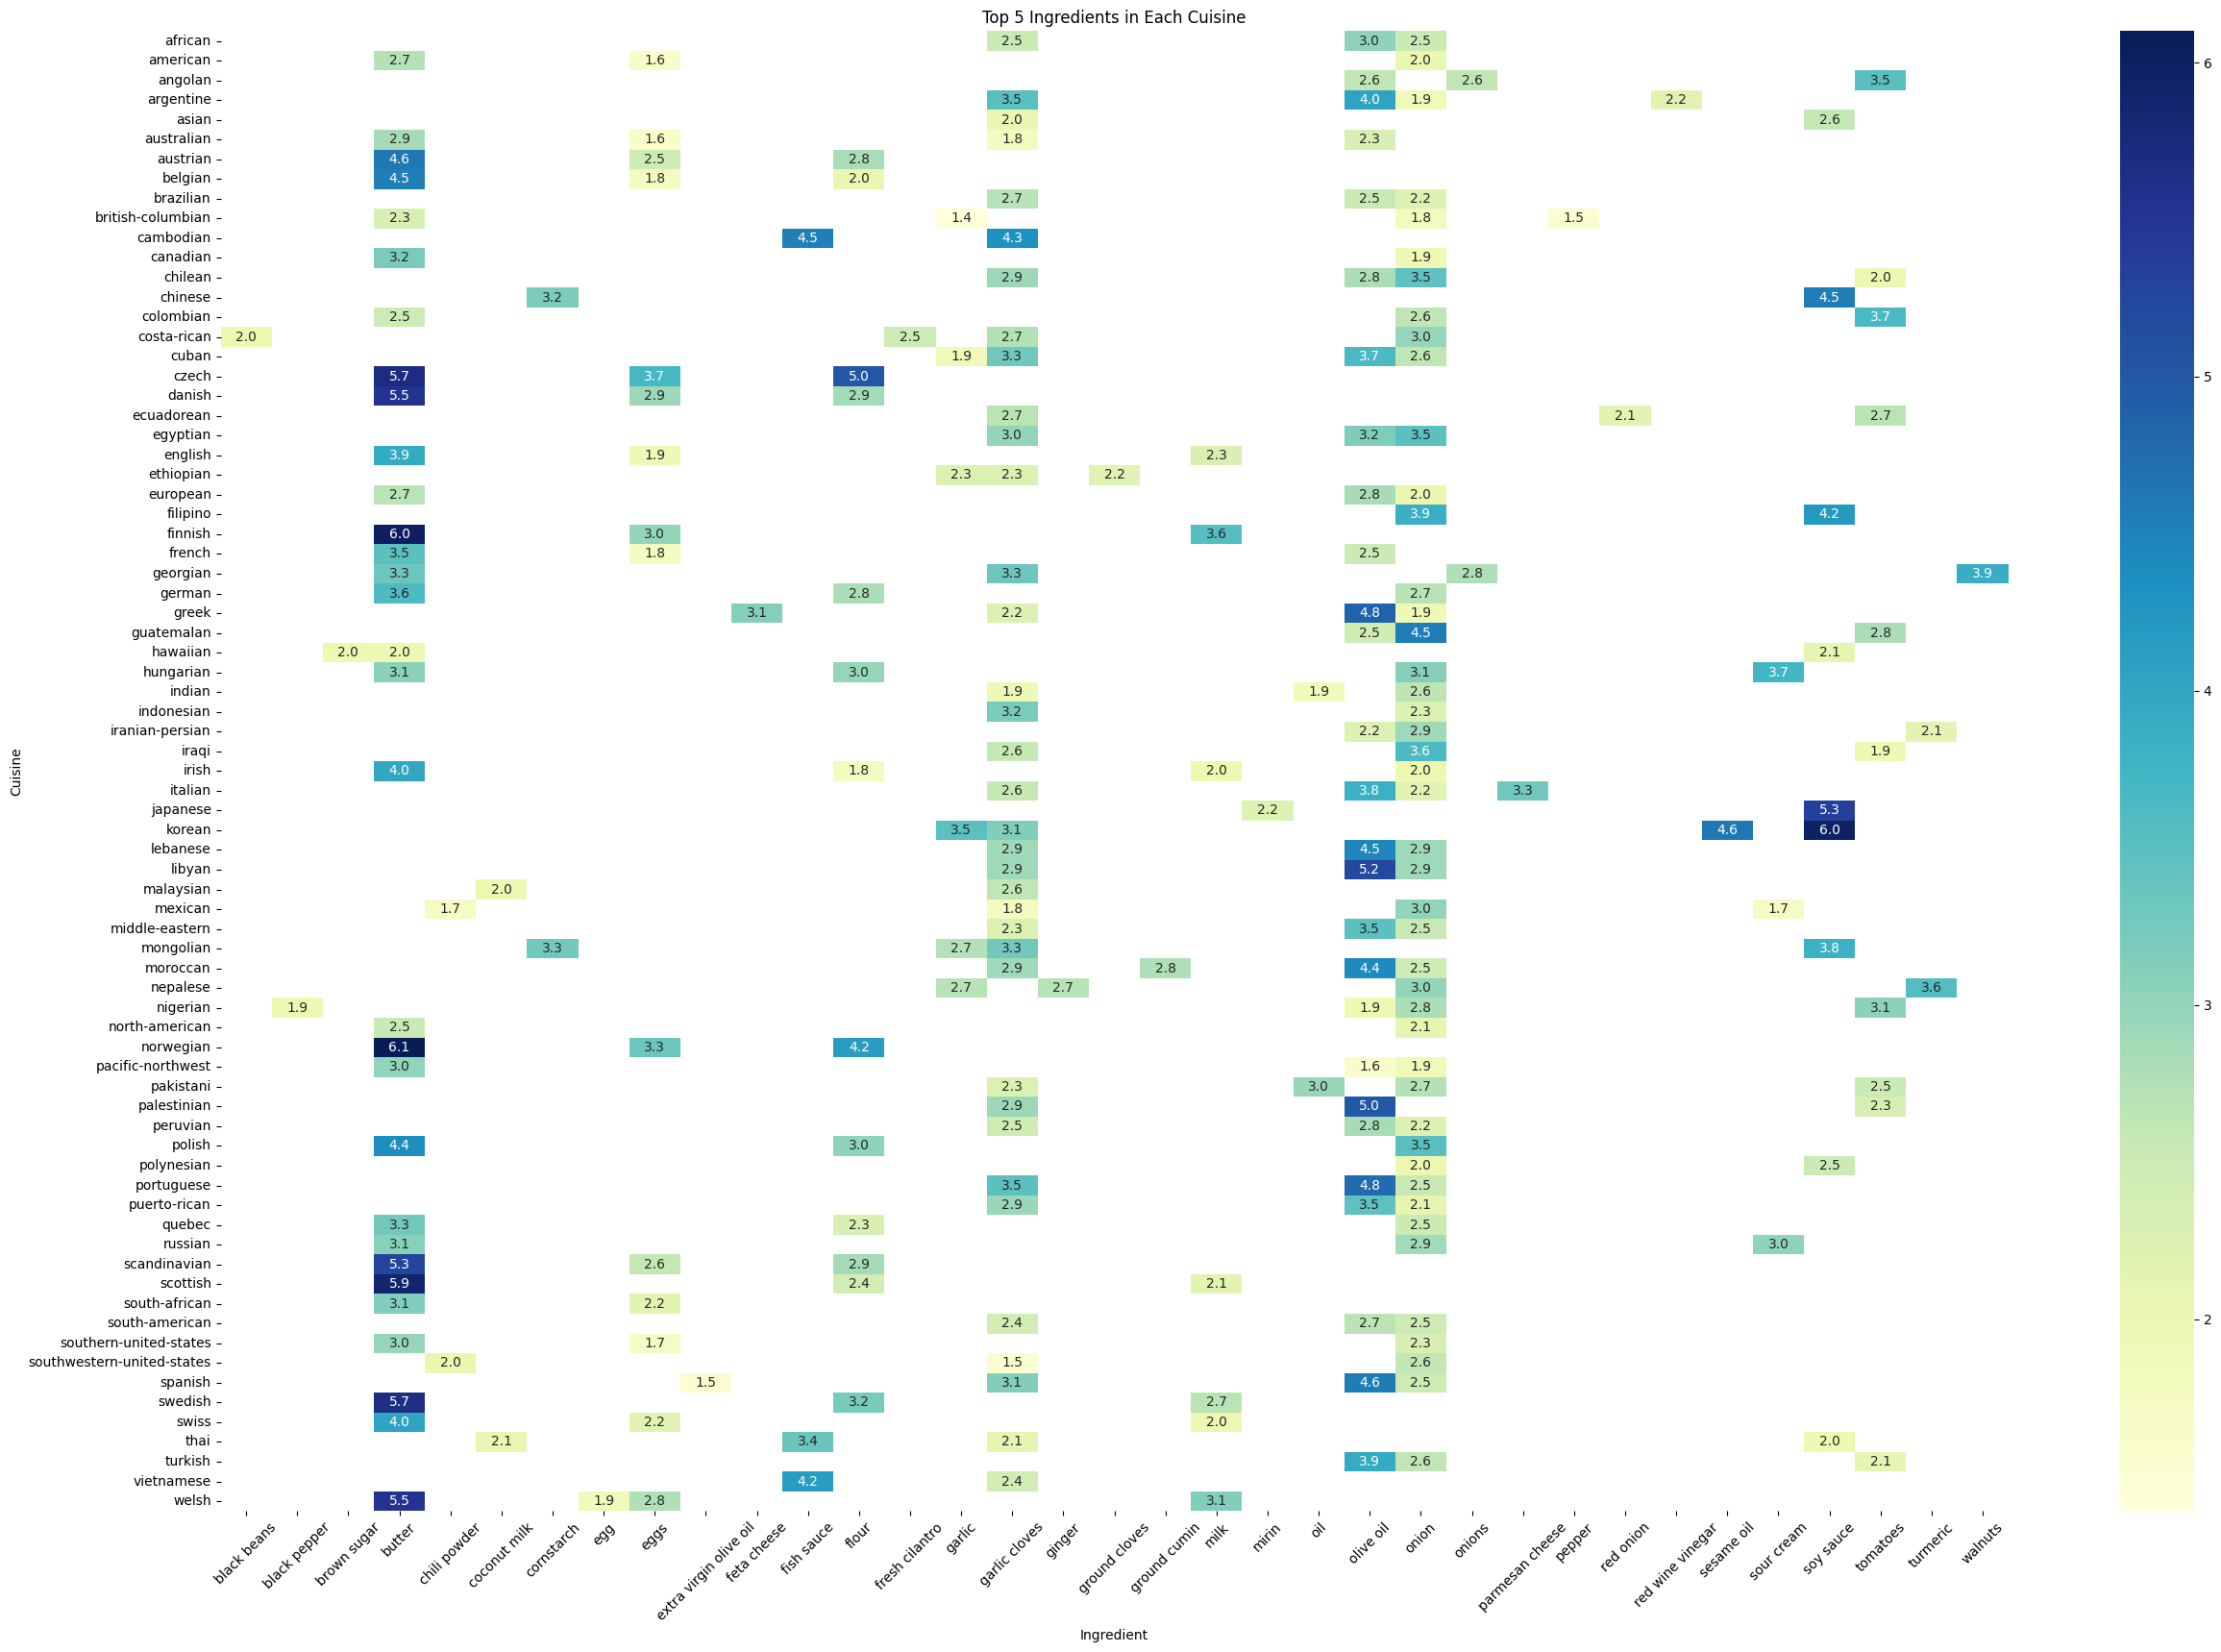

In [15]:
# Create the heatmap
plt.figure(figsize=(30, 20))
heatmap = sns.heatmap(pivot_df, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Top 5 Ingredients in Each Cuisine')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Show on map the most popular ingredient

In [38]:
# Remove the basic ingredients like salt and water
ignore_these = ["salt", "water", "sugar"]
filtered_cuisine_ingredient_dict = {}
for cuisine, ingredients in cuisine_ingredient_dict.items():
    filtered_cuisine_ingredient_dict[cuisine] = {}
    for k,v in ingredients.items():
        if k not in ignore_these:
            filtered_cuisine_ingredient_dict[cuisine][k] = v
# filtered_cuisine_ingredient_dict

In [39]:
# New dictionary for top 5 ingredients of each cuisine
top_ingredients_dict = {}

for cuisine, ingredients in filtered_cuisine_ingredient_dict.items():
    # Select the top 5 ingredients
    top_ingredients = dict(sorted(ingredients.items(), key=lambda item: item[1], reverse=True)[:1])
    top_ingredients_dict[cuisine] = top_ingredients

# Now top_5_ingredients_dict contains only the top 5 ingredients for each cuisine
top_ingredients_dict

{'north-american': {'butter': 2.52},
 'mexican': {'onion': 3.01},
 'american': {'butter': 2.72},
 'canadian': {'butter': 3.2},
 'hawaiian': {'soy sauce': 2.11},
 'southwestern-united-states': {'onion': 2.61},
 'asian': {'soy sauce': 2.59},
 'indian': {'onion': 2.65},
 'german': {'butter': 3.62},
 'european': {'olive oil': 2.84},
 'italian': {'olive oil': 3.83},
 'southern-united-states': {'butter': 2.96},
 'indonesian': {'garlic cloves': 3.2},
 'pacific-northwest': {'butter': 3.01},
 'polish': {'butter': 4.36},
 'chinese': {'soy sauce': 4.54},
 'british-columbian': {'butter': 2.31},
 'danish': {'butter': 5.54},
 'scandinavian': {'butter': 5.26},
 'swiss': {'butter': 4.03},
 'swedish': {'butter': 5.67},
 'french': {'butter': 3.47},
 'african': {'olive oil': 3.04},
 'australian': {'butter': 2.85},
 'english': {'butter': 3.94},
 'quebec': {'butter': 3.27},
 'middle-eastern': {'olive oil': 3.47},
 'lebanese': {'olive oil': 4.46},
 'greek': {'olive oil': 4.85},
 'south-american': {'olive oi

In [40]:
# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\vojsy\AppData\Local\Temp\ipykernel_7456\2078775531.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [41]:
# Prepare data for merging
for cuisine, data in top_ingredients_dict.items():
    country = cuisine_country_map.get(cuisine)
    if country:
        ingredient, percentage = next(iter(data.items()))
        world.loc[world['name'] == country, 'top_ingredient'] = ingredient
        world.loc[world['name'] == country, 'percentage'] = percentage
world

pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    -99        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

                                              geometry top_ingredient  \
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...            nan   
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...            nan   
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...            nan   
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...         butter   
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...         butter   
..                                                 ...            ...   
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...            nan   
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...            nan   
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...            nan   
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...            nan   
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...            nan   

     percentage  
0           NaN  
1           NaN  
2           NaN  
3          3.27  
4          3.01  
..          ...  
172         NaN  
173         NaN  
174         NaN  
175         NaN  
176         NaN  

[177 rows x 8 columns]

In [42]:
world['top_ingredient'] = world['top_ingredient'].replace('nan', pd.NA)
# world

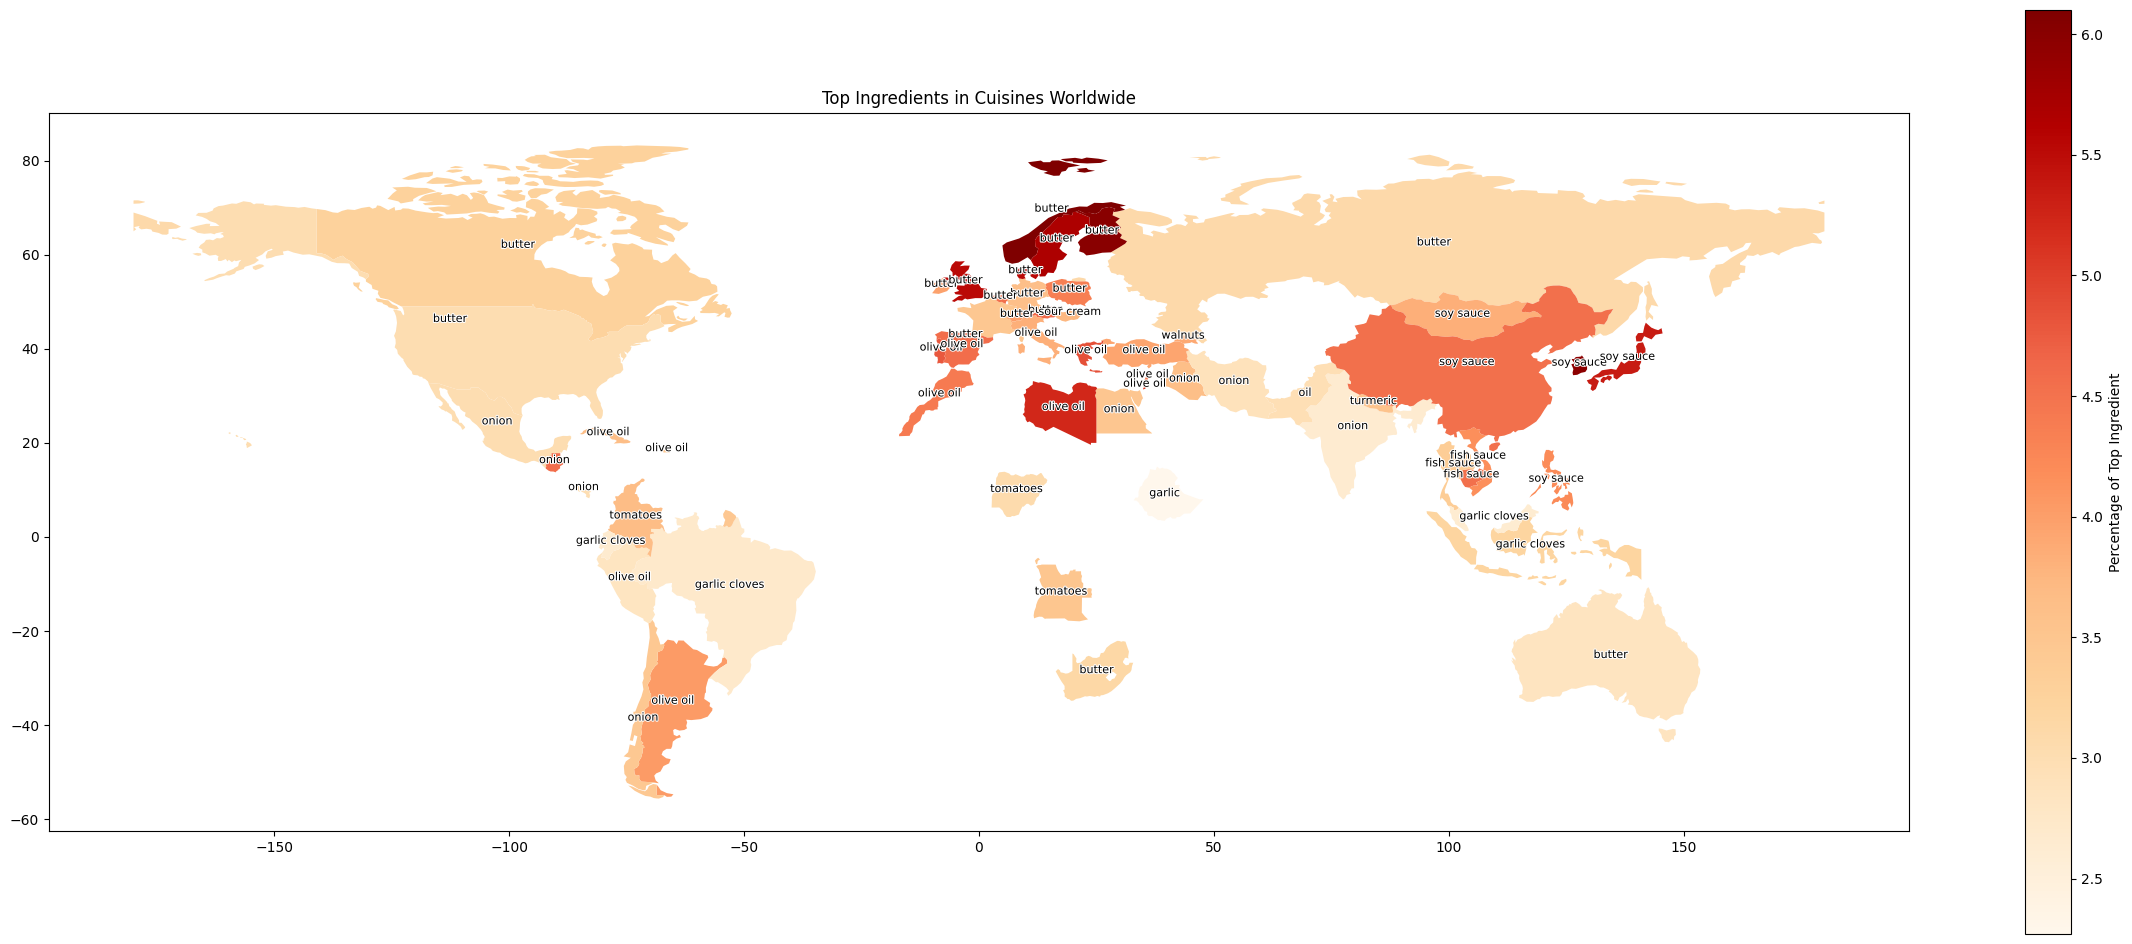

In [43]:
import matplotlib.patheffects as PathEffects
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(30, 12))
world.plot(column='percentage', ax=ax, legend=True, cmap='OrRd', legend_kwds={'label': "Percentage of Top Ingredient"})

# Annotating the map
# for idx, row in world.iterrows():
#     # Only add annotation if the top_ingredient is not NaN
#     if pd.notna(row['top_ingredient']):
#         plt.text(row['geometry'].centroid.x, row['geometry'].centroid.y, 
#                  str(row['top_ingredient']), fontsize=8, ha='center')
for idx, row in world.iterrows():
    if pd.notna(row['top_ingredient']):
        text = plt.text(row['geometry'].centroid.x, row['geometry'].centroid.y, 
                        str(row['top_ingredient']), fontsize=8, ha='center',
                        color='black', path_effects=[
                            PathEffects.withStroke(linewidth=1.5, foreground="white")
                        ])

plt.title('Top Ingredients in Cuisines Worldwide')
plt.savefig()
plt.show()